FLAT RATE PRICING
=================

In [2]:
pip install pyrsm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\jerem\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


H_o = The Proportion of purchases under FR pricing and FR with Charity pricing are equal

H_a = The Proportion of purchases under FR pricing and FR with Charity pricing are not equal

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import t
import pyrsm as rsm
from scipy.stats import ttest_ind
sales_df = pd.read_csv('Sales.csv')
sales_group_df = sales_df.groupby('Condition').sum().reset_index()
p_1 = (sales_group_df[sales_group_df['Condition'] == 'FR']['NumberSold'] / sales_group_df[sales_group_df['Condition'] == 'FR']['Riders']).values[0]
p_2 = (sales_group_df[sales_group_df['Condition'] == 'FR Charity']['NumberSold'] / sales_group_df[sales_group_df['Condition'] == 'FR Charity']['Riders']).values[0]
n_1 = sales_group_df[sales_group_df['Condition'] == 'FR']['Riders'].values[0]
n_2 = sales_group_df[sales_group_df['Condition'] == 'FR Charity']['Riders'].values[0]
test_statistic = round((p_1 - p_2) / np.sqrt((p_1 * (1 - p_1) / n_1) + (p_2 * (1 - p_2) / n_2)),3)
p_value = round(2 * (1 - norm.cdf(abs(test_statistic))),3)

if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Fail to reject the null hypothesis


Fail to reject the null hypothesis

NYOP Pricing
============

In [22]:
sales_group_df = sales_df.groupby('Condition').sum().reset_index()
p1 = (sales_group_df[sales_group_df['Condition'] == 'NYOP']['NumberSold'] / sales_group_df[sales_group_df['Condition'] == 'NYOP']['Riders']).values[0]
p2 = (sales_group_df[sales_group_df['Condition'] == 'NYOP Charity']['NumberSold'] / sales_group_df[sales_group_df['Condition'] == 'NYOP Charity']['Riders']).values[0]
n1 = sales_group_df[sales_group_df['Condition'] == 'NYOP']['Riders'].values[0]
n2 = sales_group_df[sales_group_df['Condition'] == 'NYOP Charity']['Riders'].values[0]

test_statistic = round((p1 - p2) / np.sqrt((p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2)),3)
p_value = round(2 * (1 - norm.cdf(abs(test_statistic))),3)
print(p_value)

if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

0.0
Reject the null hypothesis


Question_a

Load “NYOP.csv”. Create a variable called UnitPrice which takes the variable, Price, and divides it by Number. After doing so, next change the type of the variable, Number, to a factor variable

In [5]:
nyop_df = pd.read_csv('NYOP.csv')
nyop_df['UnitPrice'] = nyop_df['Price'] / nyop_df['Number']
nyop_df['Number'] = pd.Categorical(nyop_df['Number'])
nyop_df

,Condition,Number,Price,UnitPrice
0,NYOP,1,1.00,1.00
1,NYOP,1,1.00,1.00
2,NYOP,1,0.01,0.01
3,NYOP,1,0.10,0.10
4,NYOP,1,0.01,0.01
...,...,...,...,...
3093,NYOP Charity,1,9.38,9.38
3094,NYOP Charity,1,1.00,1.00
3095,NYOP Charity,1,0.93,0.93
3096,NYOP Charity,1,9.38,9.38


Question_b

Visualize both Price and UnitPrice against the factor variable, Number by creating box plots and interpreting them.

Text(0, 0.5, 'UnitPrice')

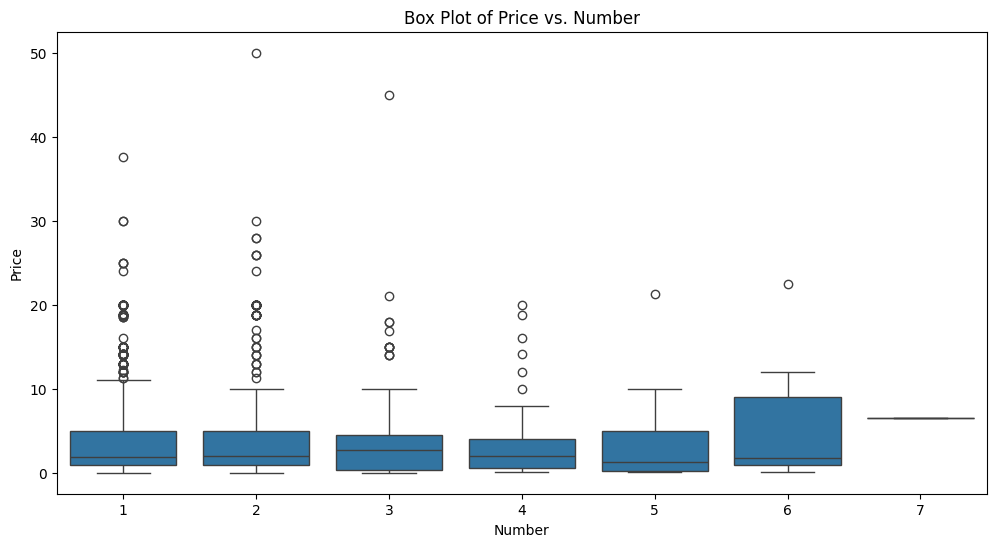

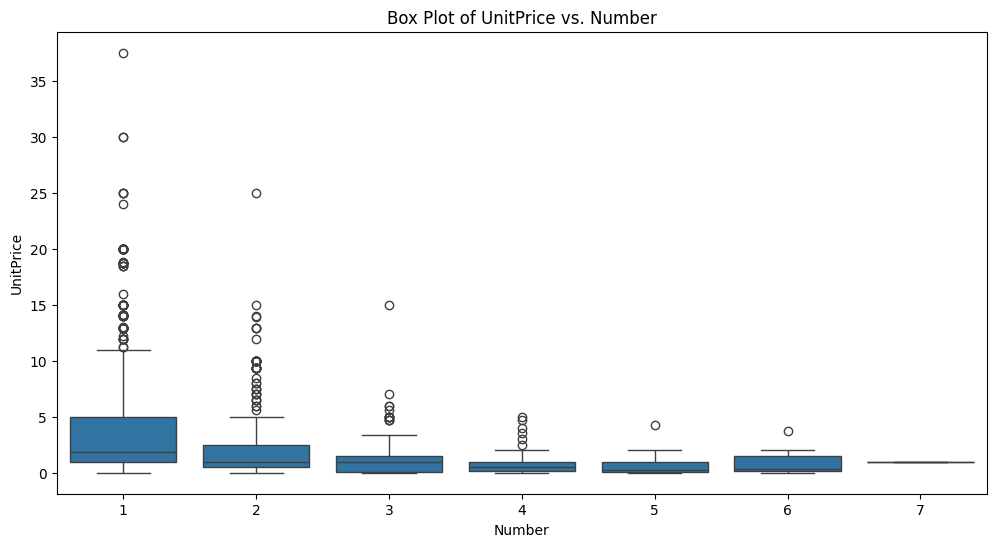

In [6]:
# Create another box plot for Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Number', y='Price', data=nyop_df)
plt.title('Box Plot of Price vs. Number')
plt.xlabel('Number')
plt.ylabel('Price')


# Create another box plot for UnitPrice
plt.figure(figsize=(12, 6))
sns.boxplot(x='Number', y='UnitPrice', data=nyop_df)
plt.title('Box Plot of UnitPrice vs. Number')
plt.xlabel('Number')
plt.ylabel('UnitPrice')

Question C Determine the average unit purchase price for both the NYOP and the NYOP Charity conditions. Does the difference seem small or substantial? Formulate a statistical test to determine if these two average unit prices are different.

In [7]:
average = nyop_df.groupby('Condition')['UnitPrice'].mean().reset_index()
print(average)

      Condition  UnitPrice
0          NYOP   1.040439
1  NYOP Charity   5.680480


Question d

Ho = There is no difference between the average unit price for NYOP and NYOP Charity

Ha = There is a difference between the average unit price for NYOP and NYOP Charity

Question E

Use the pyrsm library to perform the test computation (Compare means). What can you conclude? What is the likelihood you have made either a Type I or Type II error based on your conclusion?

In [8]:
# Filter data for the two conditions you want to compare

cm = rsm.basics.compare_means({"nyop_df": nyop_df}, var1="Condition", var2="UnitPrice", alt_hyp="two-sided")
cm.summary()

Pairwise mean comparisons (t-test)
Data      : nyop_df
Variables : Condition, UnitPrice
Samples   : independent
Confidence: 0.95
Adjustment: None
   Condition  mean    n  n_missing    sd    se    me
        NYOP  1.04 1641          0 1.305 0.032 0.063
NYOP Charity  5.68 1457          0 4.670 0.122 0.240
          Null hyp.                      Alt. hyp.  diff p.value    
NYOP = NYOP Charity NYOP not equal to NYOP Charity -4.64  < .001 ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


The p-value in the given hypothesis test is extremely low (less than 0.001), providing strong evidence against the null hypothesis. Therefore, we conclude in favor of the alternative hypothesis, indicating that there is a significant difference in the average unit price between the NYOP and NYOP with Charity pricing strategies.

A Type I error occurs when we reject a true null hypothesis. Since our p-value is very low (less than the alpha level of 0.05), the data suggests that it is very unlikely that we are making a Type I error. The low p-value indicates strong evidence against the null hypothesis, and thus we reject it in favor of the alternative hypothesis.

The p-value is actually an estimate of the probability of observing the given data (or something more extreme) assuming that the null hypothesis is true. A p-value of < 0.05 means that there is less than 5% chance that the observed difference in means would occur if the null hypothesis were true. Therefore, the likelihood of committing a Type I error in this case seems to be very low.

A Type II error occurs when we fail to reject a false null hypothesis. In your case, we're rejecting the null hypothesis, so we're not in a situation where a Type II error would occur.

So, both the likelihoods of Type I and Type II errors seem to be low based on our test results.

Question f

Use filtering to investigate the difference in means for people that purchased 1 picture. Similarly, do the analysis for the group that purchased 6 pictures. Discuss your observations.

In [9]:
#one_picture

one_nyop_df = nyop_df[nyop_df['Number'] == 1]
one_cm = rsm.basics.compare_means({"one_nyop_df": one_nyop_df}, var1="Condition", var2="UnitPrice", alt_hyp="two-sided")
one_cm.summary()

Pairwise mean comparisons (t-test)
Data      : one_nyop_df
Variables : Condition, UnitPrice
Samples   : independent
Confidence: 0.95
Adjustment: None
   Condition  mean    n  n_missing    sd    se    me
        NYOP 1.177 1162          0 1.432 0.042 0.082
NYOP Charity 5.941 1203          0 4.830 0.139 0.273
          Null hyp.                      Alt. hyp.   diff p.value    
NYOP = NYOP Charity NYOP not equal to NYOP Charity -4.765  < .001 ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


A Type I error occurs when we reject a true null hypothesis. Since our p-value is very low (less than the alpha level of 0.05), the data suggests that it is very unlikely that we are making a Type I error. The low p-value indicates strong evidence against the null hypothesis, and thus we reject it in favor of the alternative hypothesis.

The p-value is actually an estimate of the probability of observing the given data (or something more extreme) assuming that the null hypothesis is true. A p-value of < 0.05 means that there is less than 5% chance that the observed difference in means would occur if the null hypothesis were true. Therefore, the likelihood of committing a Type I error in this case seems to be very low.

A Type II error occurs when we fail to reject a false null hypothesis. In your case, we're rejecting the null hypothesis, so we're not in a situation where a Type II error would occur.

So, both the likelihoods of Type I and Type II errors seem to be low based on our test results.

In [10]:
#six_pictures

six_nyop_df = nyop_df[nyop_df['Number'] == 6]
six_cm = rsm.basics.compare_means({"six_nyop_df": one_nyop_df}, var1="Condition", var2="UnitPrice", alt_hyp="two-sided")
six_cm.summary()

Pairwise mean comparisons (t-test)
Data      : six_nyop_df
Variables : Condition, UnitPrice
Samples   : independent
Confidence: 0.95
Adjustment: None
   Condition  mean    n  n_missing    sd    se    me
        NYOP 1.177 1162          0 1.432 0.042 0.082
NYOP Charity 5.941 1203          0 4.830 0.139 0.273
          Null hyp.                      Alt. hyp.   diff p.value    
NYOP = NYOP Charity NYOP not equal to NYOP Charity -4.765  < .001 ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


p-value: Since the p-value is greater than the alpha level of 0.05, we would fail to reject the null hypothesis. This means that, based on this sample, there's not enough evidence to say that the UnitPrice for "NYOP" and "NYOP Charity" are different.

Type I Error: The risk of committing a Type I error (rejecting a true null hypothesis) is low here since we're not rejecting the null hypothesis.

Type II Error: Because we failed to reject the null hypothesis, the risk of a Type II error (failing to reject a false null hypothesis) could be a concern. The p-value isn't extremely high, but it's above the typical 0.05 threshold, so we can't rule out the possibility that failing to find a significant difference is due to low statistical power, especially given the small sample sizes

The small sample size and high standard errors (SE) suggest that this test may not have sufficient power to detect a real difference between the groups, if one exists, thus increasing the chance of a Type II error

Question g

If you do the analysis by hand for the group that purchased 6 pictures are your results the same as those produced above? Why or Why not?

In [11]:
six_pic_nyop = six_nyop_df[six_nyop_df['Condition'] == 'NYOP']
six_pic_nyop_charity = six_nyop_df[six_nyop_df['Condition'] == 'NYOP Charity']

six_pic_nyop_mean = six_pic_nyop['UnitPrice'].mean()
six_pic_nyop_charity_mean = six_pic_nyop_charity['UnitPrice'].mean()

six_pic_nyop_std = six_pic_nyop['UnitPrice'].std()
six_pic_nyop_charity_std = six_pic_nyop_charity['UnitPrice'].std()

n5 = six_pic_nyop.shape[0]
n6 = six_pic_nyop_charity.shape[0]

In [12]:
test_statistic = (six_pic_nyop_mean - six_pic_nyop_charity_mean)/ np.sqrt(((six_pic_nyop_std**2)/n5) + ((six_pic_nyop_charity_std**2)/n6))
print(f"T value = ", round(test_statistic,3))

df_six = (six_pic_nyop_std**2/n5 + six_pic_nyop_charity_std**2/n6)**2 / ((six_pic_nyop_std**2/n5)**2/(n5-1) + (six_pic_nyop_charity_std**2/n6)**2/(n6-1))

p_value = 2 * (1 - t.cdf(abs(test_statistic), df_six))
print(f"P value = ",round(p_value,3))

T value =  -1.383
P value =  0.288


Economics
=========

Question a 

The unit cost of making a photo is $1.20. Compute the average daily profit under each of the four pricing strategies.

In [13]:
sales_df = pd.read_csv('Sales.csv')
nyop_df = pd.read_csv('NYOP.csv')

print(sales_df.head())
print(nyop_df.head())

    Condition  NumberSold  Riders  MerchandiseRevenues
0          FR          77   12663              4592.41
1          FR          63   15561              6688.57
2  FR Charity          79   14796              6476.78
3  FR Charity         101   15796              5845.94
4        NYOP        1137   14077              4845.27
  Condition  Number  Price
0      NYOP       1   1.00
1      NYOP       1   1.00
2      NYOP       1   0.01
3      NYOP       1   0.10
4      NYOP       1   0.01


In [14]:
#FR Daily Profit
fr_df = sales_df[sales_df['Condition'] == 'FR']
profit_fr = (fr_df['NumberSold'].sum()*(12.95 - 1.20))/2
print("Average Daily Profit for FR: " + str(profit_fr))

#FRC Daily Profit
frc_df = sales_df[sales_df['Condition'] == 'FR Charity']
frc_df_revenue = frc_df['NumberSold'].sum()*(12.95*0.5)
profit_frc = round((frc_df['NumberSold'].sum()*((12.95*0.5) - 1.20))/2 , 3)
print("Average Daily Profit for FR Charity: " + str(profit_frc))

#NYOP Daily Profit
nyop_df_ = nyop_df[nyop_df['Condition'] == 'NYOP']
total_cost_nyop = nyop_df_['Number'].sum()*1.20
total_revenue_nyop = nyop_df_['Price'].sum()
profit_nyop = round((total_revenue_nyop - total_cost_nyop)/2, 3)
print("Average Daily Profit for NYOP: " + str(profit_nyop))

#NYOPC Daily Profit
nyopc_df = nyop_df[nyop_df['Condition'] == 'NYOP Charity']
total_cost_nyopc = nyopc_df['Number'].sum()*1.20
total_revenue_nyopc = (nyopc_df['Price'] * 0.5).sum()
profit_nyopc = round((total_revenue_nyopc - total_cost_nyopc)/3, 3)
print("Average Daily Profit for NYOP Charity: " + str(profit_nyopc))

Average Daily Profit for FR: 822.5
Average Daily Profit for FR Charity: 474.75
Average Daily Profit for NYOP: -334.1
Average Daily Profit for NYOP Charity: 885.518


Question b

Which strategy is the most profitable? What is the ranking of the strategies in terms of profits?



In [15]:
import pandas as pd

# Create a dictionary to store the conditions and their average daily profits
data = {
    'Condition': ['FR', 'FR Charity', 'NYOP', 'NYOP Charity'],
    'Average Daily theme park Profit': [profit_fr, profit_frc, profit_nyop, profit_nyopc]
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by 'Average Daily Profit' in descending order
sorted_df = df.sort_values(by=['Average Daily theme park Profit'], ascending=False, ignore_index=True)

# Display the sorted DataFrame
print(sorted_df)


      Condition  Average Daily theme park Profit
0  NYOP Charity                          885.518
1            FR                          822.500
2    FR Charity                          474.750
3          NYOP                         -334.100


Among the four strategies, NYOP Charity yields the highest profit.

Question c

Now think about the additional value created by the FR Charity and NYOP Charity conditions. Rather than focusing only on profits to the theme park, let’s talk about total profits to society which should include both the theme park and the charity that benefits. What is the ranking of societal profits in this case?

In [16]:
#societal profits
frc_societal_profit = sorted_df[sorted_df['Condition'] == 'FR Charity']['Average Daily theme park Profit'] + round(frc_df_revenue/2, 3)
nyopc_societal_profit = sorted_df[sorted_df['Condition'] == 'NYOP Charity']['Average Daily theme park Profit'] + round(total_revenue_nyopc/3, 3)

conditions = [
    sorted_df["Condition"] == "FR Charity",
    sorted_df["Condition"] == "NYOP Charity",
]
values = [
    frc_societal_profit,
    nyopc_societal_profit,
]
sorted_df['Average Daily Societal Profit'] = np.select(conditions,values,sorted_df["Average Daily theme park Profit"])
sorted_df.sort_values(by=['Average Daily Societal Profit'], ascending=False, inplace=True)
sorted_df['Yearly Societal Profit'] = sorted_df['Average Daily Societal Profit'] * 365
print(sorted_df)

      Condition  Average Daily theme park Profit  \
0  NYOP Charity                          885.518   
2    FR Charity                          474.750   
1            FR                          822.500   
3          NYOP                         -334.100   

   Average Daily Societal Profit  Yearly Societal Profit  
0                       2488.236               908206.14  
2                       1057.500               385987.50  
1                        822.500               300212.50  
3                       -334.100              -121946.50  


Question d
How much additional societal profit does the leading strategy generate over the others over the entire year (assume 365 days)?


In [17]:
sorted_df['Additional Profit generated by NYOP Charity'] = abs(sorted_df['Yearly Societal Profit'] - sorted_df[sorted_df['Condition']=='NYOP Charity']['Yearly Societal Profit'].values[0])
sorted_df

,Condition,Average Daily theme park Profit,Average Daily Societal Profit,Yearly Societal Profit,Additional Profit generated by NYOP Charity
0,NYOP Charity,885.518,2488.236,908206.14,0.00
2,FR Charity,474.750,1057.500,385987.50,522218.64
1,FR,822.500,822.500,300212.50,607993.64
3,NYOP,-334.100,-334.100,-121946.50,1030152.64


Question_e
Are merchandise sales a concern?

In [23]:
# Extracting merchandise revenues for each condition
fr_merchandise = sales_df[sales_df['Condition'] == 'FR']['MerchandiseRevenues']
frc_merchandise = sales_df[sales_df['Condition'] == 'FR Charity']['MerchandiseRevenues']
nyop_merchandise = sales_df[sales_df['Condition'] == 'NYOP']['MerchandiseRevenues']
nyopc_merchandise = sales_df[sales_df['Condition'] == 'NYOP Charity']['MerchandiseRevenues']

# Performing two-sample t-tests
t_stat_fr, p_value_fr = ttest_ind(fr_merchandise, frc_merchandise)
t_stat_nyop, p_value_nyop = ttest_ind(nyop_merchandise, nyopc_merchandise)

t_stat_fr, p_value_fr, t_stat_nyop, p_value_nyop

(-0.4758914703888096,
 0.6810671641842052,
 -0.5657877462466617,
 0.611093537921214)

No merchandise sales are not a concern. After performning hypothesis testing, we can conclude that there is no difference in the average unit price between the NYOP and NYOP with Charity pricing strategies or FR and FR with charity pricing strategies in regards to our merchandise sales. Therefore, we can conclude that the merchandise sales are not a concern.

Final Analysis

Shared Social Responsibility Review

We have analyzed the information provided regarding the difference in sales and profitability, both personal and societal, between our theme park’s regular flat-rate pricing strategy, our Name Your Own Price pricing strategy, and charitable versions of both strategies. We have partnered with a nationally recognized patient-support foundation to provide this charitable service. Per our review of the information contained within our sales and NYOP sales data we have come to conclusions regarding our optimal strategies moving forward described below. Along with this we include a brief summary of the data used and the calculations involved in this analysis.

Our data consists of daily sales data for sales of the photos taken during our guest’s ride on one of our roller coasters, the number of photos sold, the number of riders, and the total merchandise revenues for each of the four conditions. Each pricing strategy was utilized and observed individually for 2 days except for the NYOP Charity condition which was instead observed for 3 days.These photos are produced at a cost of $1.20 per photo and are not produced physically until a sale has been made. Our pricing is as follows:

    $12.95 flat-rate price, i.e., FR

    $12.95 flat-rate price with 50% of revenue going to charity

    Name Your Own Price, i.e., NYOP

    Name Your Own Price with 50% of revenue going to charity

We began with a consideration of our sales efforts using our flat-rate pricing strategy alongside its equivalent charitable strategy. Within these strategies we found that the proportion of sales was roughly equal and there was not a statistically significant difference between the proportion of sales for either pricing strategy. Moving into the NYOP and NYOP charitable pricing strategies, we did find a statistically significant difference between the charitable and non-charitable strategies, with the proportion of sales for the charitable pricing strategy being 8.39% and the non-charitable strategy being only 4.07%. The large test statistics and near 0 p-value gives evidence that there is a difference between the two strategies with the charitable pricing strategy being the dominant strategy. As well, the average purchase price for the NYOP charitable pricing strategy was roughly 5 times higher than the non-charitable strategy, creating an even greater disparity between the two in terms of revenue generated.

When taking into consideration the revenue in terms of its societal values we find again that the NYOP charitable pricing strategy is the dominant strategy, creating the highest overall societal profit. When extrapolated out to a year's worth of sales this is only magnified, however, the Flat Rate pricing strategy has the highest return for the theme park itself. Our average daily profits for each strategy can be seen below.

    Average Daily Profit for FR: 822.5

    Average Daily Profit for FR Charity: 474.75

    Average Daily Profit for NYOP: -334.1

    Average Daily Profit for NYOP Charity: 885.518

Considerations must be made in regards to the optimal strategy moving forwards, as the theme parks continued profitability must be kept in mind. We would advise potentially testing a continued usage of the NYOP charitable pricing strategy, as our recent testing has shown it to have the highest daily profit of all pricing strategies, due in part to the higher quantity of photos sold, along with their higher profits during those days despite the outgoing charitable donations. 

To summarize our findings, our recommendation would be to move forwards with switching over to the Name Your Own Price charitable pricing strategy. The Name Your Own Price charitable strategy had the highest park profits, highest societal profits, and individual daily revenue, with those higher profits coming in after  considering that 50% went to our partnered organization. It may be worth testing continued NYOP charitable pricing strategies, as sales clearly increased when the strategy was utilized. The publicity gained from this along with the societal profits could be utilized by the theme park to propel our business forwards.
